# Imports And Variables

In [1]:
import json
import matplotlib.pyplot as plt
import csv
import fasttext
import pandas as pd

In [3]:
# Reads the data as pandas dataframe
with open('data.json', 'r', encoding='utf-8') as f:
    data = pd.read_json(f)

# Dislike And Like Statistics

In [4]:
with open('data.json', 'r') as f:
    dataset = json.load(f)

dislikeCount = {}
likeCount = {}

currCount = 0
currID = None

for item in dataset:
    if item['feedback'] == 'dislike':
        if item['sessionId'] != currID:
            currID = item['sessionId']
            currCount = 1
        else:
            currCount += 1 
        if(currCount==1): dislikeCount["dislikes when count is 1"] = dislikeCount.get("dislikes when count is 1", 0) + 1
        elif currCount != 1: dislikeCount["dislikes when count is >1"] = dislikeCount.get("dislikes when count is >1", 0) + 1
        
    elif item['feedback'] == 'like':
        if item['sessionId'] != currID:
            currID = item['sessionId']
            currCount = 1
        else:
            currCount += 1
        if(currCount==1): likeCount["likes when count is 1"] = likeCount.get("likes when count is 1", 0) + 1
        elif currCount != 1: likeCount["likes when count is >1"] = likeCount.get("likes when count is >1", 0) + 1
        

print(dislikeCount)
print(likeCount)

{'dislikes when count is 1': 1015, 'dislikes when count is >1': 321}
{'likes when count is 1': 1304, 'likes when count is >1': 384}


# Plotting

Dislike and likes pie chart

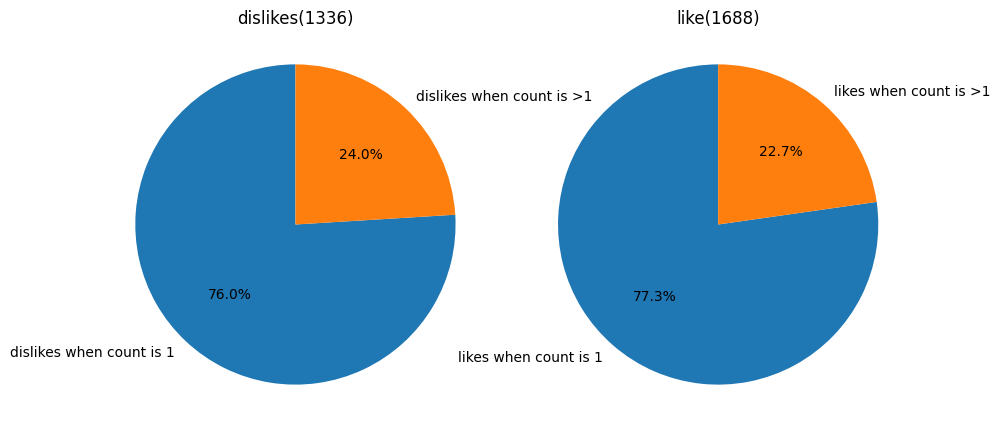

In [6]:
labels1 = list(dislikeCount.keys())
labels2 = list(likeCount.keys())
valuesDislikes = list(dislikeCount.values())
valuesLikes = list(likeCount.values())
dislikeTitle = f"dislikes({sum(dislikeCount.values())})"  
likeTitle = f"like({sum(likeCount.values())})" 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].pie(valuesDislikes, labels=labels1, autopct='%1.1f%%', startangle=90)
axs[0].axis('equal')
axs[0].set_title(dislikeTitle)
axs[1].pie(valuesLikes, labels=labels2, autopct='%1.1f%%', startangle=90)
axs[1].axis('equal')
axs[1].set_title(likeTitle)
plt.show()